# Правильный многоугольник Рело. Векторизация вычислений в numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

### Этап 1. Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус $R$ окружности, описанной вокруг правильного $n$-угольника с длиной стороны $l$, вычисляется по формуле (1):

$$R = \frac{l}{2sin(\frac{\pi}{n})}$$

Длина стороны $l$ правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело $r$.

In [3]:
l = r

In [4]:
R = l / (2 * np.sin(np.pi / n)) #радиус описанной окружности

In [10]:
t = np.arange(0, 2 * np.pi, 2 * np.pi / n)

vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
vertices

#Зафиксируем прямоугольную декартову систему координат. 
# Центр треугольника размещаем в точке center.
#  Построим матрицу vertices с координатами вершин правильного треугольника, используя параметрическое описание точек описанной окружности

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

(-3.3197640478403514, 6.206515393788478, -5.499999999999999, 5.500000000000001)

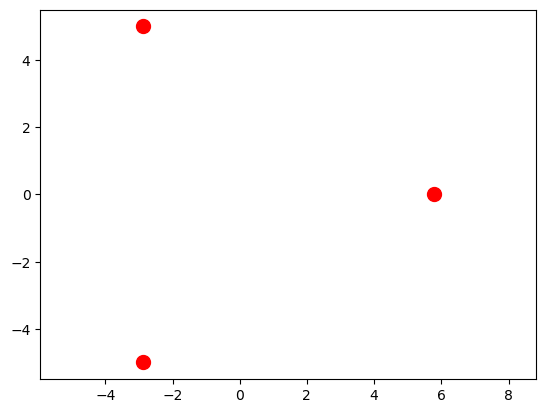

In [12]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize = 20)
plt.axis('equal')

### Этап 2. Представление одной стороны треугольника Рело

In [13]:
alpha = 2 * np.pi / n #центральный угол, соответствующий стороне правильног n-угольника
beta = alpha / 2 #центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника

In [14]:
angel = np.linspace(-beta / 2, beta / 2, N) # Вычислим массив angle значений угла для построения координат точек стороны треугольника Рело, состоящий из N элементов

Вычислим матрицу **side0** с координатами точек первой стороны треугольника Рело, используя параметрическое описание окружности с центром в точке **vertices[0]** радиусом **r** для значений угла на отрезке $[\pi - \frac{\beta}{2}, \pi + \frac{\beta}{2}]$.

In [15]:
side0 = vertices[0] + r * np.transpose([np.cos(angel + np.pi), 
                                        np.sin(angel + np.pi)])


(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

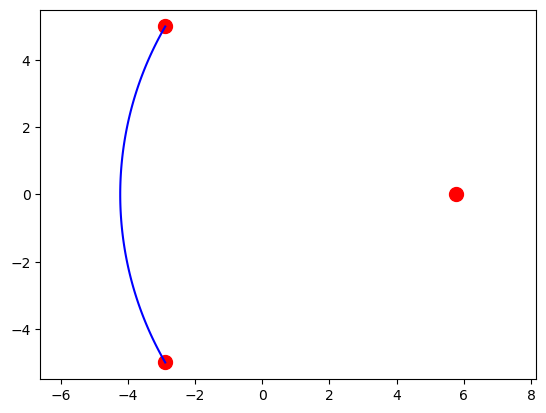

In [17]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize = 20)
plt.plot(side0[:,0], side0[:,1], 'b-', markersize = 20)
plt.axis('equal')

In [18]:
side1 = vertices[1] + r * np.transpose([np.cos(angel + np.pi + alpha), 
                                        np.sin(angel + np.pi + alpha)]) #Вычислим матрицу side1 с координатами точек, описывающих сторону треугольника Рело относительно второй вершины vertices[1]

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

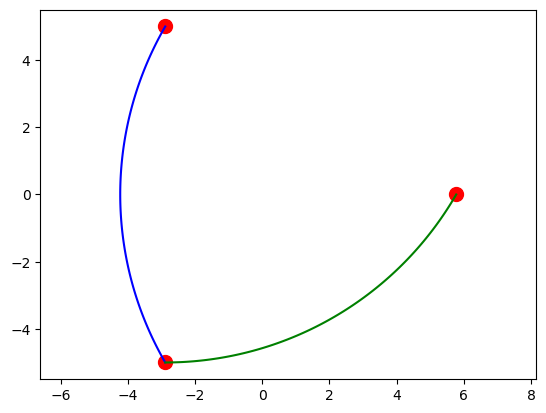

In [19]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize = 20)
plt.plot(side0[:,0], side0[:,1], 'b-', markersize = 20)
plt.plot(side1[:,0], side1[:,1], 'g-', markersize = 20)
plt.axis('equal')

### Этап 3. Моделирование границы треугольника Рело

In [ ]:
listSides = [vertices[i] + r * np.transpose([np.cos(angel + np.pi + i * alpha),
                                           np.sin(angel + np.pi + i * alpha)]) 
            for i in range(n)]
# Создадим СПИСОК из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело

In [ ]:
sides = np.concatenate(listSides)
# С помощью фунции concatenate из расширения numpy объединим массивы, созданные для каждой из сторон треугольника Рело, в единый массив sides 

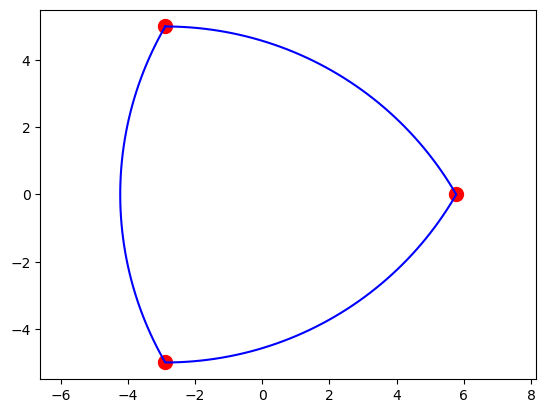

In [23]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize = 20)
plt.plot(sides[:,0], sides[:,1], 'b-', markersize = 20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

Рассмотрим треугольник $ABC$. Из определения правильного многоугольника Рело следует, что треугольник $ABC$ является равнобедренным.

Пусть правильный $n$-угольник ($n$ - нечётное число) является основой для построения правильного многоугольника Рело шириной $r$. Опишем вокруг него окружность радиуса $R$ и заметим, что каждая из его вершина равномерно распределена по ней.

Так как угол $\angle BAC$, который опирается на ту же дугу, что и центральный $\angle \theta$, то он будет равен его половине. То есть:
$$\angle BAC = \frac{\angle \theta}{2}$$
$\angle \theta = \frac{2 \pi}{n}$. Подставляя в формулу выше получим:
$$\angle BAC = \frac{2 \pi}{2n} = \frac{\pi}{n}$$

Следовательно, по свойству равнобедренного треугольника, $\angle HAC = \frac{\pi}{2n}$, где $AH$ - высота треугольника. Найдем через синус угла $\angle HBC$ сторону $a$:
$$\sin(\angle HAC) = \frac{a}{2r} \Rightarrow$$
$$a = 2r\sin(\angle HAC) = 2r\sin(\frac{\pi}{2n})$$

Рассмотрим равнобедренный треугольник $OAC$. В нем боковые стороны равны $R$, а основание равно $a$. Тогда, по теореме косинусов:

$$a^2 = R^2 + R^2 - 2 R R \cos(\angle AOC) \Rightarrow$$
$$a^2 = 2R^2(1 - \cos(\angle AOC)$$
Используя тригонометрическую формулу $1 - \cos(x) = 2 \sin(\frac{x}{2})$ получим:
$$a^2 = 2R^22 \sin(\frac{\angle AOC}{2}) \Rightarrow$$
$$a = 2R \sin(\frac{\angle AOC}{2})$$

Исходя того, что $\angle AOC$ — центральный угол, получим:
$$2r \sin(\frac{\pi}{2n}) = 2R \sin(\frac{2 \pi}{2n}) \Rightarrow$$
$$R = \frac{r \sin(\frac{\pi}{2n})}{\sin(\frac{\pi}{n})}$$

In [42]:
nOfVert, nOfPoints = 10, 800
center = np.array([0, 0])
r = 10. 
# Определяем переменные (количество вершин, количество точек,координаты центра, ширину)

In [43]:
R = r * np.sin(np.pi / (2 * nOfVert)) / np.sin(np.pi / nOfVert) #радиусы окружностей

In [44]:
tArray = np.arange(0, 2 * np.pi, 2 * np.pi / nOfVert)
verts = np.transpose([center[0] + R * np.cos(tArray),center[1] + R * np.sin(tArray)])
# вершины многоугольника

In [45]:
alpha = 2 * np.pi / nOfVert
beta = alpha / 2
angles = np.linspace(-beta / 2, beta / 2, nOfPoints)
sides = np.concatenate([verts[step] + r * np.transpose([np.cos(angles + np.pi + step * alpha),np.sin(angles + np.pi + step * alpha)]) for step in range(nOfVert)])
# массив точек для построения стороны многоугольника Рело

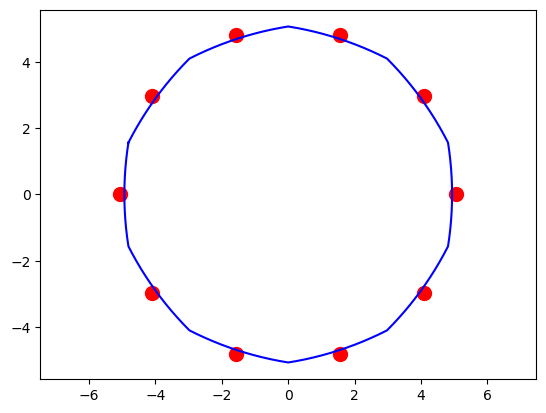

In [46]:
plt.plot(verts[:,0], verts[:,1], 'r.', markersize = 20)
plt.plot(sides[:,0], sides[:,1], 'b-', markersize = 20)
plt.axis('equal');

### Задание 4.3. Результирующая пользовательская функция

In [ ]:
def regularPolygonReloFunc(n: int = 3, 
                         center: np.ndarray = np.array([0, 0]),
                         r: float = 1., 
                         N: int = 100) -> np.ndarray:
    """
    Покоординатно описывает границы многоугольника Рело.

    Параметры:
    n:      Количество вершин (по умолчанию 3);
    center: Координаты центра многоугольника (по умолчанию np.array([0, 0]));
    r:      Радиус дуг, образующих границу (по умолчанию 1);
    N:      Количество точек на каждой дуге (по умолчанию 100).

    Возвращает:
    Матрицу координат точек, описывающих границу
    правильного многоугольника Рело. Первый столбец — координаты по х, второй — по у.        
    """
    assert r > 0, "r > 0"
    assert N > 0, "N > 0"
    
    alpha = 2 * np.pi / n              
    beta = alpha / 2                    
    angles = np.linspace(-beta/2, beta/2, N)  
    
    R = r * np.sin(np.pi/(2*n)) / np.sin(np.pi/n)
    t_array = np.arange(0, 2*np.pi, alpha)
    verts = np.column_stack([center[0] + R*np.cos(t_array),
                           center[1] + R*np.sin(t_array)])
    
    sides = []
    for step in range(n):
        arc_points = verts[step] + r * np.column_stack([
            np.cos(angles + np.pi + step*alpha),
            np.sin(angles + np.pi + step*alpha)
        ])
        sides.append(arc_points)
    
    return np.vstack(sides)

## Задание 4.4. Тестирование функции

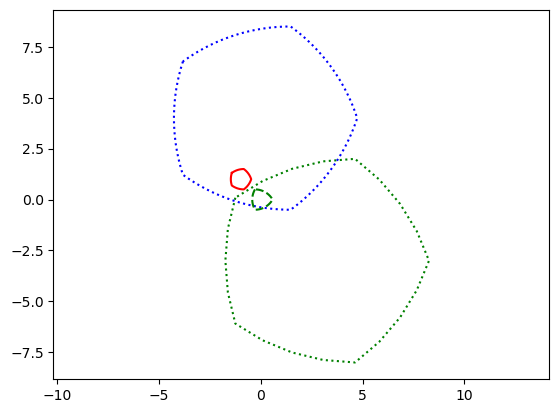

In [77]:
#Все аргументы позиционные;
tempMatrix = regularPolygonReloFunc( 5, np.array([-1, 1]), 1, 10)
plt.plot(tempMatrix[:,0], tempMatrix[:,1], 'r-',  markersize = 20)

#Все аргументы ключевые;
tempMatrix = regularPolygonReloFunc(N = 5, n = 5, r = 10, center = np.array([3, -3]))
plt.plot(tempMatrix[:,0], tempMatrix[:,1], 'g:',  markersize = 20)

#Аргументы позиционные и ключевые;
tempMatrix = regularPolygonReloFunc(5, center = np.array([0, 4]), N = 100, r = 9)
plt.plot(tempMatrix[:,0], tempMatrix[:,1], 'b:',   markersize = 20)

#Все аргументы определяются стандартными значениями;
tempMatrix = regularPolygonReloFunc()
plt.plot(tempMatrix[:,0], tempMatrix[:,1], 'g--', markersize = 20)

plt.axis('equal');
plt.show()

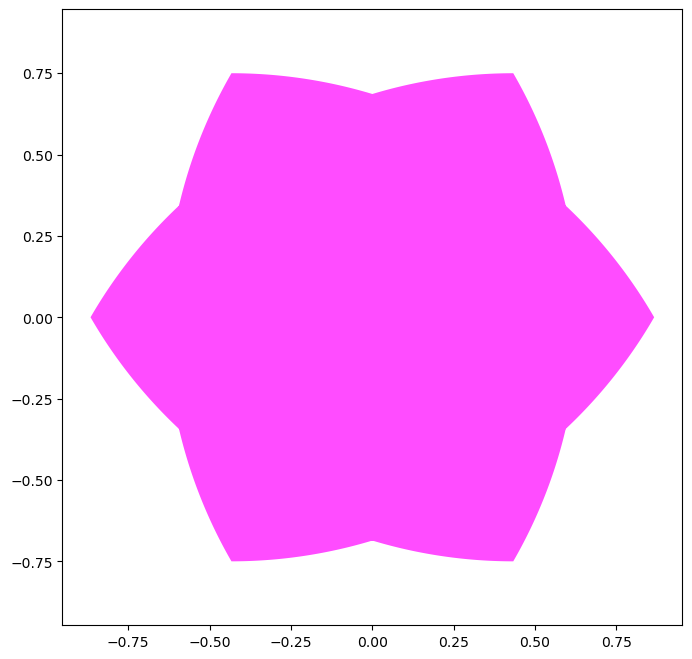

In [69]:
tempMatrix1 = regularPolygonReloFunc(n=3, r=1.5, N=200)


angle = np.radians(60)
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
empMatrix2 = (tempMatrix1 - [0, 0]) @ rotation_matrix + [0, 0]  


combined = np.vstack([tempMatrix1, empMatrix2])

plt.figure(figsize=(8, 8))
plt.fill(combined[:, 0], combined[:, 1], 'magenta', alpha=0.7)
plt.axis('equal')
plt.show()